# Tennis prediction with rank

### Question or problem definition

We want to see if we can create a prediction model that can predict whether a player will win a match or not, based on rank feature

### Acquire training and testing data

In [1]:
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Acquire data

In [2]:
train_df = pd.read_csv('input/balanced-2014-2017.csv')

In [3]:
train_df.head()

,match_id,date,player1_id,player2_id,player1_rank,player2_rank,player1_rank_points,player2_rank_points,player1_elo_rating,player2_elo_rating,won
0,155602,21/04/2014,4894,4022,50.0,15.0,947.0,2065.0,1867.0,2036.0,1
1,155603,21/04/2014,4659,5763,92.0,16.0,605.0,2040.0,1861.0,2112.0,0
2,155604,21/04/2014,3908,4789,102.0,24.0,569.0,1580.0,1871.0,2085.0,0
3,155605,21/04/2014,4467,4585,28.0,43.0,1315.0,1016.0,1979.0,1902.0,0
4,155202,06/03/2014,5231,4742,31.0,1.0,1205.0,14085.0,1992.0,2510.0,1


In [4]:
test_df = pd.read_csv('input/balanced-2018.csv')

In [5]:
test_df.head()

,match_id,date,player1_id,player2_id,player1_rank,player2_rank,player1_rank_points,player2_rank_points,player1_elo_rating,player2_elo_rating,won
0,167084,09/04/2018,6364,6196,26.0,65.0,1627.0,815.0,1989.0,1859.0,1
1,167085,09/04/2018,4311,5420,62.0,93.0,851.0,626.0,1948.0,1768.0,0
2,167086,09/04/2018,5902,4291,61.0,91.0,864.0,638.0,1876.0,1844.0,0
3,167087,09/04/2018,3893,4994,57.0,55.0,895.0,932.0,1801.0,1868.0,0
4,167088,09/04/2018,4752,5333,38.0,102.0,1295.0,586.0,2040.0,1685.0,1


### Wrangle, prepare, cleanse data

#### Analyse by describing data

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11602 entries, 0 to 11601
Data columns (total 11 columns):
match_id               11602 non-null int64
date                   11602 non-null object
player1_id             11602 non-null int64
player2_id             11602 non-null int64
player1_rank           11507 non-null float64
player2_rank           11505 non-null float64
player1_rank_points    11507 non-null float64
player2_rank_points    11505 non-null float64
player1_elo_rating     11586 non-null float64
player2_elo_rating     11586 non-null float64
won                    11602 non-null int64
dtypes: float64(6), int64(4), object(1)
memory usage: 997.2+ KB


#### Verify how representative is training dataset

In [7]:
train_df.describe()

,match_id,player1_id,player2_id,player1_rank,player2_rank,player1_rank_points,player2_rank_points,player1_elo_rating,player2_elo_rating,won
count,11602.000000,11602.000000,11602.000000,11507.000000,11505.000000,11507.000000,11505.000000,11586.000000,11586.000000,11602.000000
mean,160443.217290,5830.131874,5902.309516,101.983488,102.700304,1493.727557,1501.468144,1925.355256,1924.654756,0.499914
std,3656.338188,4543.194422,4756.332233,188.023829,195.194436,2011.202338,2074.862460,193.270879,193.829332,0.500022
min,154487.000000,644.000000,644.000000,1.000000,1.000000,1.000000,1.000000,1405.000000,1400.000000,0.000000
25%,157387.250000,4533.000000,4541.000000,24.000000,25.000000,579.000000,579.000000,1804.000000,1806.000000,0.000000
50%,160287.500000,5016.000000,5019.500000,53.000000,54.000000,865.000000,858.000000,1906.000000,1906.000000,0.000000
75%,163314.750000,5658.000000,5663.000000,96.000000,97.000000,1510.000000,1495.000000,2023.000000,2018.000000,1.000000
max,173783.000000,47166.000000,52374.000000,2166.000000,2159.000000,16950.000000,16950.000000,2630.000000,2628.000000,1.000000


We only have tennis tournaments with level above ATP 250, so it seems reasonable to have an average rank of 101-102

We have to deal with missing values to plot ranks

In [8]:
train_df.isnull().sum()

match_id                0
date                    0
player1_id              0
player2_id              0
player1_rank           95
player2_rank           97
player1_rank_points    95
player2_rank_points    97
player1_elo_rating     16
player2_elo_rating     16
won                     0
dtype: int64

In [9]:
train_df = train_df.dropna(subset=['player1_rank', 'player2_rank'])

In [10]:
train_df.isnull().sum()

match_id                0
date                    0
player1_id              0
player2_id              0
player1_rank            0
player2_rank            0
player1_rank_points     0
player2_rank_points     0
player1_elo_rating     16
player2_elo_rating     16
won                     0
dtype: int64

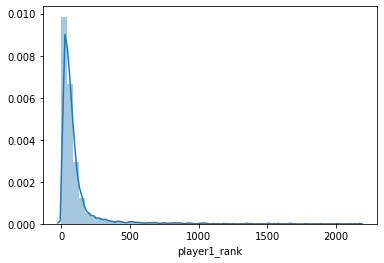

In [11]:
sns.distplot(train_df['player1_rank'])

In [12]:
test_df.isnull().sum()

match_id                0
date                    0
player1_id              0
player2_id              0
player1_rank           13
player2_rank           15
player1_rank_points    13
player2_rank_points    15
player1_elo_rating     16
player2_elo_rating     16
won                     0
dtype: int64

In [13]:
test_df = test_df.dropna(subset=['player1_rank', 'player2_rank'])

In [14]:
test_df.isnull().sum()

match_id                0
date                    0
player1_id              0
player2_id              0
player1_rank            0
player2_rank            0
player1_rank_points     0
player2_rank_points     0
player1_elo_rating     16
player2_elo_rating     16
won                     0
dtype: int64

Drop columns that we don't want to use :

In [15]:
train_df = train_df.drop(['match_id', 'date', 'player1_id', 'player2_id', 'player1_rank_points', 'player2_rank_points', 'player1_elo_rating', 'player2_elo_rating'], axis=1)

In [16]:
test_df = test_df.drop(['match_id', 'date', 'player1_id', 'player2_id', 'player1_rank_points', 'player2_rank_points', 'player1_elo_rating', 'player2_elo_rating'], axis=1)

Create rank difference feature

In [17]:
train_df['rank_diff'] = train_df['player1_rank'] - train_df['player2_rank']
train_df = train_df.drop(['player1_rank', 'player2_rank'], axis=1)

In [18]:
test_df['rank_diff'] = test_df['player1_rank'] - test_df['player2_rank']
test_df = test_df.drop(['player1_rank', 'player2_rank'], axis=1)

Visualize rank

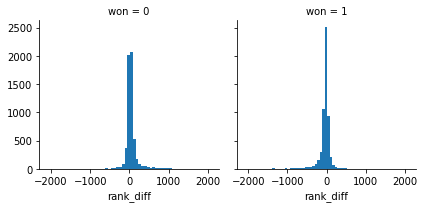

In [19]:
g = sns.FacetGrid(train_df, col='won')
g.map(plt.hist, 'rank_diff', bins=50)
plt.show()

In [20]:
train_df['won'].value_counts()

0    5718
1    5705
Name: won, dtype: int64

In [21]:
train_df.head()

,won,rank_diff
0,1,35.0
1,0,76.0
2,0,78.0
3,0,-15.0
4,1,30.0


Model, predict, solve

In [22]:
# machine learning
from sklearn.linear_model import LogisticRegression

In [23]:
X_train = train_df.drop('won', axis=1)
Y_train = train_df['won']
X_test = test_df.drop('won', axis=1).copy()
Y_test = test_df['won']

In [24]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1510
           1       0.63      0.64      0.63      1437

    accuracy                           0.64      2947
   macro avg       0.64      0.64      0.64      2947
weighted avg       0.64      0.64      0.64      2947



In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(Y_test, Y_pred)

array([[972, 538],
       [523, 914]], dtype=int64)

In [29]:
Y_test.shape

(2947,)

accuracy = (True positive + True negative) / (all population)

In [30]:
(972+914)/2947

0.6399728537495758

**Questions** we have :
- How to do when we always have player_1 won ? Do we need to balance test dataset ?
- How to interpret the coefficients ?
- Model evaluation f1-score, accuracy ? How to truly evaluate our model ?

Calculate our odds (to see for a future betting strategy) :

In [31]:
pd.DataFrame({'Feature': ['rank_diff'], 'Coefficient': logreg.coef_[0]})

,Feature,Coefficient
0,rank_diff,-0.00501


When rank_diff increases the logit odd decreases

In [32]:
logreg.intercept_

array([-0.00365532])

In [33]:
test_df.head()

,won,rank_diff
0,1,-39.0
1,0,-31.0
2,0,-30.0
3,0,2.0
4,1,-64.0


In [34]:
import math

In [35]:
math.exp(logreg.intercept_+logreg.coef_[0][0]*(-39))

1.2113489869894645